In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import 

In [2]:
os.getcwd()

'E:\\FORE\\Term 3\\MLP'

In [3]:
os.chdir("E:\\FORE\\Term 4\\NLP\\CNN Datasets")

In [4]:
import pickle
from pathlib import Path

# Path to the rice variety dataset
data_dir = os.chdir("E:\\FORE\\Term 4\\NLP\\CNN Datasets\\Rice_Image_Dataset\\training_set")

In [5]:
import tensorflow as tf

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
tf.__version__

'2.9.1'

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('E:\\FORE\\Term 4\\NLP\\CNN Datasets\\Rice_Image_Dataset\\training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical') # batchsize refers to the number of images processed at once

Found 59987 images belonging to 5 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('E:\\FORE\\Term 4\\NLP\\CNN Datasets\\Rice_Image_Dataset\\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical') #datapreprocessed
#class mode is a category as there are 5 different varieties of rice

Found 15013 images belonging to 5 classes.


In [10]:
cnn = tf.keras.models.Sequential() #initializing the neural network

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) #convolution

In [12]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #pooling

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')) #filter is the feature detector matrix 32x32
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #adding 2nd convolution layer

In [14]:
cnn.add(tf.keras.layers.Flatten()) #flattening

In [15]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu')) #full connection

In [16]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn.add(tf.keras.layers.Dense(5, activation='softmax')) #using softmax to predict probability of each class
#this also enables categorical crossentropy to calculate the average difference between the actual
#and predicted probability distributions for all the 5 varities/ classes

In [19]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 122s 65ms/step - loss: 1.3356 - accuracy: 0.3933 - val_loss: 1.1605 - val_accuracy: 0.3989
Epoch 2/25
1875/1875 [==============================] - 123s 66ms/step - loss: 1.1212 - accuracy: 0.4046 - val_loss: 1.0481 - val_accuracy: 0.4071
Epoch 3/25
1875/1875 [==============================] - 122s 65ms/step - loss: 1.0341 - accuracy: 0.4153 - val_loss: 1.0113 - val_accuracy: 0.4541
Epoch 4/25
1875/1875 [==============================] - 122s 65ms/step - loss: 0.9971 - accuracy: 0.4319 - val_loss: 1.0234 - val_accuracy: 0.4441
Epoch 5/25
1875/1875 [==============================] - 121s 65ms/step - loss: 0.9425 - accuracy: 0.5523 - val_loss: 1.0595 - val_accuracy: 0.3634
Epoch 6/25
1875/1875 [==============================] - 121s 65ms/step - loss: 0.8450 - accuracy: 0.5930 - val_loss: 1.0606 - val_accuracy: 0.4253
Epoch 7/25
1875/1875 [==============================] - 123s 66ms/step - loss: 0.7967 - accuracy: 0.5936 - val_loss: 1

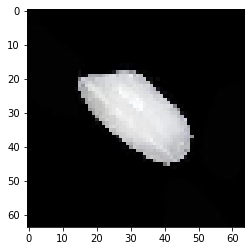

In [47]:
import numpy as np
from keras.preprocessing import image

test_image = tf.keras.preprocessing.image.load_img("E:\\FORE\\Term 4\\NLP\\CNN Datasets\\Rice_Image_Dataset\\single_prediction\\what.jpg", 
                                                   target_size = (64, 64))

plt.imshow(test_image)
plt.show()

In [48]:
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 11ms/step


array([[1.7501226e-05, 3.8268456e-01, 6.0871863e-01, 8.5676806e-03,
        1.1600094e-05]], dtype=float32)

Karacadag
